# The SARS-CoV-2 (Covid-19) epidemic analysis

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import os.path
from os import path

The data on the Covid-19 incidence are available [here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv). We download them as a file in CSV format.

In [2]:
data_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"



Data downloaded on 09.06.2020

This is the documentation of the data from [the download site](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Column name  | Description                                                                                                               |
|--------------|---------------------------------------------------------------------------------------------------------------------------|
| `Province/State`       | Province/State                                                              |
| `Country/Region`  | Country/Region                               |
| `Lat`        | Latitude                                                      |
| `Long`    | Longitude                                                            |
| `1/22/20`     | Dates                                                            |

In [3]:
raw_data = pd.read_csv(data_url)
raw_data

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
236                               NaN             Timor-Leste  -8.874217   
237                               NaN                  Belize  13.193900   
238                               NaN                    Laos  19.856270   
239                               NaN                   Libya  26.335100   
240                               NaN      West Bank and Gaza  31.952200   
241                               NaN           Guinea-Bissau  11.803700   
242                               NaN                    Mali  17.570692   
243                               NaN   Saint Kitts and Nevis  17.357822   
244             Northwest Territories                  Canada  64.825500   
245                             Yukon                  Canada  64.282300   
246                               NaN                  Kosovo  42.602636   
247                               NaN                   Burma  21.916200   
248                          Anguilla          United Kingdom  18.220600   
249            British Virgin Islands          United Kingdom  18.420700   
250          Turks and Caicos Islands          United Kingdom  21.694000   
251                               NaN              MS Zaandam   0.000000   
252                               NaN                Botswana -22.328500   
253                               NaN                 Burundi  -3.373100   
254                               NaN            Sierra Leone   8.460555   
255  Bonaire, Sint Eustatius and Saba             Netherlands  12.178400   
256                               NaN                  Malawi -13.25430

Remove Long and Lat columns (just for convenience) and make a spared copy in df_total for the "world" graph

In [4]:
df = pd.DataFrame(raw_data)

df_total=df.drop(columns=['Lat', 'Long'])
df=df_total

print(df)

                       Province/State          Country/Region  1/22/20  \
0                                 NaN             Afghanistan        0   
1                                 NaN                 Albania        0   
2                                 NaN                 Algeria        0   
3                                 NaN                 Andorra        0   
4                                 NaN                  Angola        0   
5                                 NaN     Antigua and Barbuda        0   
6                                 NaN               Argentina        0   
7                                 NaN                 Armenia        0   
8        Australian Capital Territory               Australia        0   
9                     New South Wales               Australia        0   
10                 Northern Territory               Australia        0   
11                         Queensland               Australia        0   
12                    South Australia 

Remove "not interesting" countries

In [5]:
df=df.drop(df[(df['Country/Region'] != 'Belgium') & (df['Country/Region'] != 'China') & (df['Country/Region'] != 'France') & (df['Country/Region'] != 'Germany') & (df['Country/Region'] != 'Iran') & (df['Country/Region'] != 'Italy') & (df['Country/Region'] != 'Japan') & (df['Country/Region'] != 'Korea South') & (df['Country/Region'] != 'Netherlands') & (df['Country/Region'] != 'Portugal') & (df['Country/Region'] != 'Spain') & (df['Country/Region'] != 'United Kingdom') & (df['Country/Region'] != 'US')].index)
print(df)

                       Province/State  Country/Region  1/22/20  1/23/20  \
23                                NaN         Belgium        0        0   
49                              Anhui           China        1        9   
50                            Beijing           China       14       22   
51                          Chongqing           China        6        9   
52                             Fujian           China        1        5   
53                              Gansu           China        0        2   
54                          Guangdong           China       26       32   
55                            Guangxi           China        2        5   
56                            Guizhou           China        1        3   
57                             Hainan           China        4        5   
58                              Hebei           China        1        1   
59                       Heilongjiang           China        0        2   
60                       

For convenience change China to Hong Kong in the Hong Kong line

In [6]:
df=df.set_value(df[(df['Province/State'] == 'Hong Kong')].index, 'Country/Region', 'Hong Kong')
print(df)

                       Province/State  Country/Region  1/22/20  1/23/20  \
23                                NaN         Belgium        0        0   
49                              Anhui           China        1        9   
50                            Beijing           China       14       22   
51                          Chongqing           China        6        9   
52                             Fujian           China        1        5   
53                              Gansu           China        0        2   
54                          Guangdong           China       26       32   
55                            Guangxi           China        2        5   
56                            Guizhou           China        1        3   
57                             Hainan           China        4        5   
58                              Hebei           China        1        1   
59                       Heilongjiang           China        0        2   
60                       

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


Remove colonies of France, Netherlands and UK

In [7]:
fr=df[(df['Country/Region']=='France')]
fr=fr['Province/State']
fr=fr.dropna()

ne=df[(df['Country/Region']=='Netherlands')]
ne=ne['Province/State']
ne=ne.dropna()

uk=df[(df['Country/Region']=='United Kingdom')]
uk=uk['Province/State']
uk=uk.dropna()

df=df.drop(fr.index)
df=df.drop(ne.index)
df=df.drop(uk.index)


print(df)


     Province/State  Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  \
23              NaN         Belgium        0        0        0        0   
49            Anhui           China        1        9       15       39   
50          Beijing           China       14       22       36       41   
51        Chongqing           China        6        9       27       57   
52           Fujian           China        1        5       10       18   
53            Gansu           China        0        2        2        4   
54        Guangdong           China       26       32       53       78   
55          Guangxi           China        2        5       23       23   
56          Guizhou           China        1        3        3        4   
57           Hainan           China        4        5        8       19   
58            Hebei           China        1        1        2        8   
59     Heilongjiang           China        0        2        4        9   
60            Henan      

Remove Province/State column and compute total daily sum for China

In [8]:
df.drop('Province/State', axis = 1, inplace = True)
grouped=df.groupby('Country/Region')
df=grouped.sum()
print(df)

                1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Country/Region                                                                  
Belgium               0        0        0        0        0        0        0   
China               548      641      918     1401     2067     2869     5501   
France                0        0        2        3        3        3        4   
Germany               0        0        0        0        0        1        4   
Hong Kong             0        2        2        5        8        8        8   
Iran                  0        0        0        0        0        0        0   
Italy                 0        0        0        0        0        0        0   
Japan                 2        2        2        2        4        4        7   
Netherlands           0        0        0        0        0        0        0   
Portugal              0        0        0        0        0        0        0   
Spain                 0     

Construct graphs for the countries above

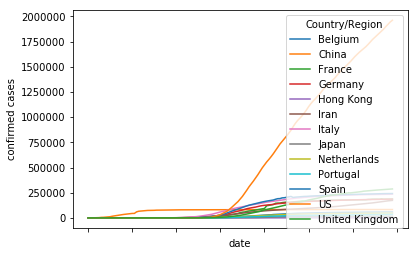

In [9]:
ax=df.transpose().plot()
ax.set_xlabel("date")
ax.set_ylabel("confirmed cases")
plt.show()

Next we make the analogous graph for the Covid-19 incidence in the world

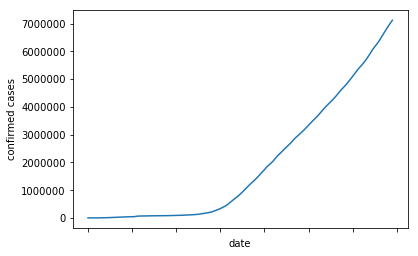

In [10]:
df=df_total
df.drop('Province/State', axis = 1, inplace = True)
df.drop('Country/Region', axis = 1, inplace = True)
df=df.sum(axis=0)

ax=df.transpose().plot()
ax.set_xlabel("date")
ax.set_ylabel("confirmed cases")
plt.show()
